## Black Friday Sales Prediction


## Importing related Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import warnings
warnings.filterwarnings('ignore')

## Load and Inspect Dataset

#### displaying the the first 5 coloums of our dataset

In [2]:
df = pd.read_csv('train.csv')

In [3]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


#### displaying the shape of our dataset(rows and coloumn) total

In [4]:
df.shape

(550068, 12)

In [7]:
#### displaying the total coloumns names (sara features ka naam)

In [5]:
df.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [6]:
#### statical info were given by describe
#### we got here total count of product catagory 2 mein kam count hai

In [8]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [9]:
#### getting insight of dtypes of all coloumns and also about catagorical coloumns details which we further encoded with one or label encoder

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [11]:
#### getting info of all unique values in c.

In [12]:
df.apply(lambda x: len(x.unique()))

User_ID                        5891
Product_ID                     3631
Gender                            2
Age                               7
Occupation                       21
City_Category                     3
Stay_In_Current_City_Years        5
Marital_Status                    2
Product_Category_1               20
Product_Category_2               18
Product_Category_3               16
Purchase                      18105
dtype: int64

In [13]:
#### the Null values percentage against every columns

In [14]:
df.isna().sum()
for feature in df:
    print('{} has {} % missing values'.format(feature,np.round(df[feature].isnull().sum()/len(df)*100,4)))

User_ID has 0.0 % missing values
Product_ID has 0.0 % missing values
Gender has 0.0 % missing values
Age has 0.0 % missing values
Occupation has 0.0 % missing values
City_Category has 0.0 % missing values
Stay_In_Current_City_Years has 0.0 % missing values
Marital_Status has 0.0 % missing values
Product_Category_1 has 0.0 % missing values
Product_Category_2 has 31.5666 % missing values
Product_Category_3 has 69.6727 % missing values
Purchase has 0.0 % missing values


In [15]:
#### filling th null values of pd_2 with mean 

In [16]:
col = ['Product_Category_2']
for i in col:
 df.loc[df.loc[:,i].isnull(),i]=df.loc[:,i].mean()

In [17]:
#### filling th null values of pd_3 with mean 

In [18]:
col = ['Product_Category_3']
for i in col:
 df.loc[df.loc[:,i].isnull(),i]=df.loc[:,i].mean()

In [19]:
df.isna().any()

User_ID                       False
Product_ID                    False
Gender                        False
Age                           False
Occupation                    False
City_Category                 False
Stay_In_Current_City_Years    False
Marital_Status                False
Product_Category_1            False
Product_Category_2            False
Product_Category_3            False
Purchase                      False
dtype: bool

In [20]:
df[df.duplicated()]

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase


In [21]:
## Univariate Analysis

In [23]:
#### # Creating a distplot for dependent feature 'Purchase'
# uniform distribution not outliers
####x amount y buyers

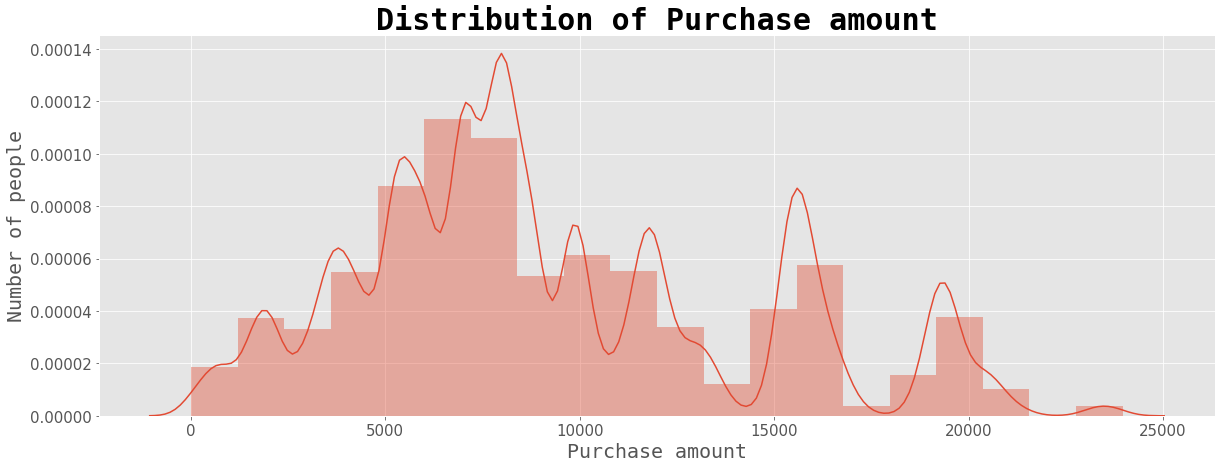

In [24]:
plt.style.use('ggplot')
plt.figure(figsize = (20, 7))
sns.distplot(df['Purchase'], bins = 20)
plt.title('Distribution of Purchase amount', fontdict = {'fontname' : 'Monospace', 'fontsize' : 30, 'fontweight' : 'bold'})
plt.xlabel('Purchase amount', fontdict = {'fontname' : 'Monospace', 'fontsize' : 20})
plt.ylabel('Number of people', fontdict = {'fontname' : 'Monospace', 'fontsize' : 20})
plt.tick_params(labelsize = 15)
plt.show()

In [25]:
# Checking Relationship between Marital_Status and Purchase

<Figure size 648x576 with 0 Axes>

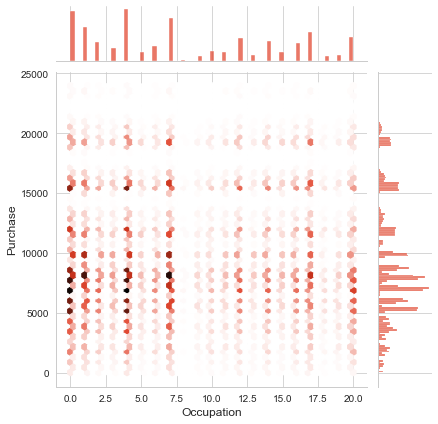

In [26]:
sns.set_style("whitegrid")
plt.figure(figsize=(9,8))

sns.jointplot(x='Occupation',y='Purchase',data=df, kind='hex')

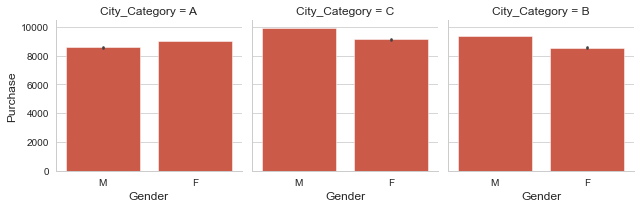

In [28]:
#### Impact of purchase on City_Category
city = sns.FacetGrid(df,col="City_Category")
city.map(sns.barplot, "Gender", "Purchase")

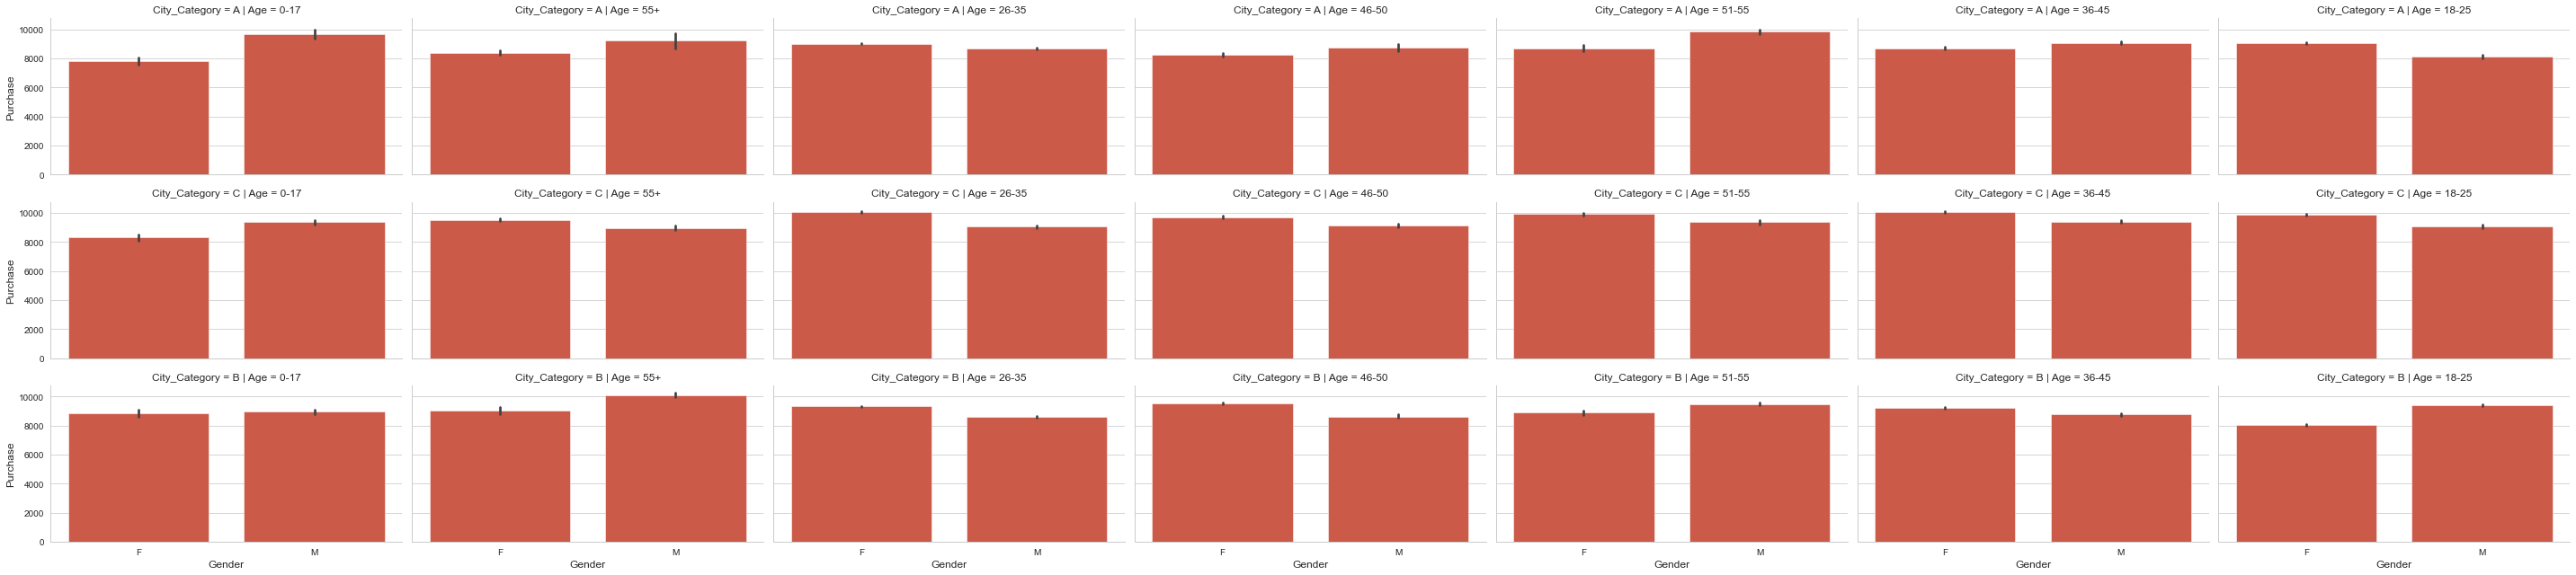

In [29]:
#### Impact of purchase on Age
age = sns.FacetGrid(df,col="Age",row="City_Category",aspect=1.9)
age.map(sns.barplot, "Gender", "Purchase")

<AxesSubplot:xlabel='City_Category', ylabel='Purchase'>

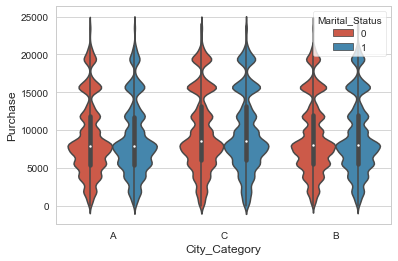

In [30]:
#### Impact of Purchase on Marital_status
sns.violinplot(x="City_Category", y="Purchase", hue="Marital_Status", data=df)

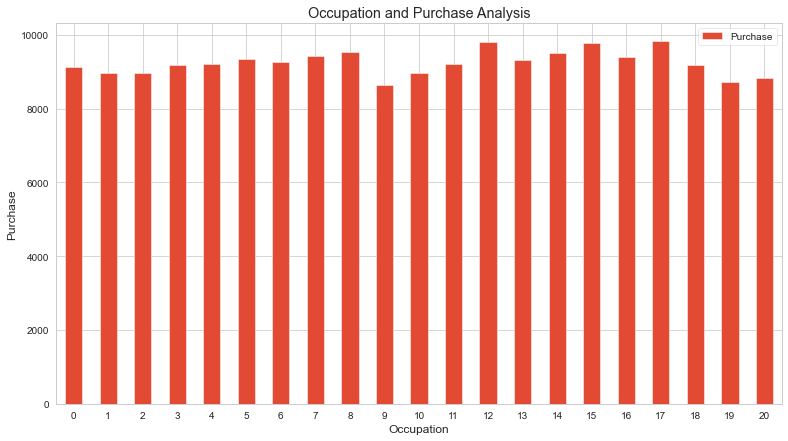

In [31]:
# bivariate analysis
occupation_plot = df.pivot_table(index='Occupation', values='Purchase', aggfunc=np.mean)
occupation_plot.plot(kind='bar', figsize=(13, 7))
plt.xlabel('Occupation')
plt.ylabel("Purchase")
plt.title("Occupation and Purchase Analysis")
plt.xticks(rotation=0)
plt.show()

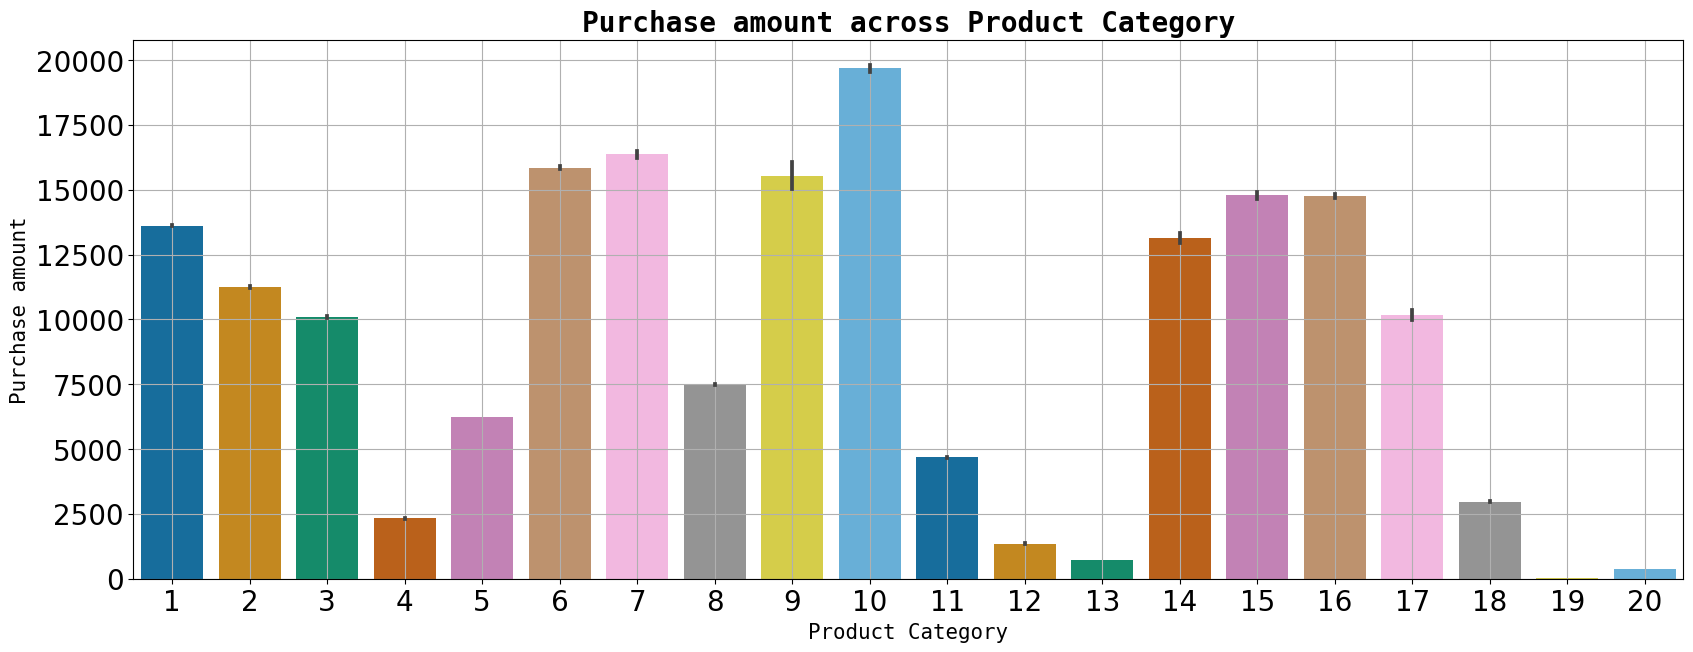

In [32]:
# Creating a barplot of 'Product_Category_1 vs Purchase'
plt.style.use('default')
plt.figure(figsize = (20, 7))
sns.barplot(df['Product_Category_1'], df['Purchase'], palette = 'colorblind')
plt.title('Purchase amount across Product Category', fontdict = {'fontname' : 'Monospace', 'fontsize' : 20, 'fontweight' : 'bold'})
plt.xlabel('Product Category', fontdict = {'fontname' : 'Monospace', 'fontsize' : 15})
plt.ylabel('Purchase amount', fontdict = {'fontname' : 'Monospace', 'fontsize' : 15})
plt.tick_params(labelsize = 20)
plt.grid()
plt.show()

In [33]:
# Multivariate Analysis

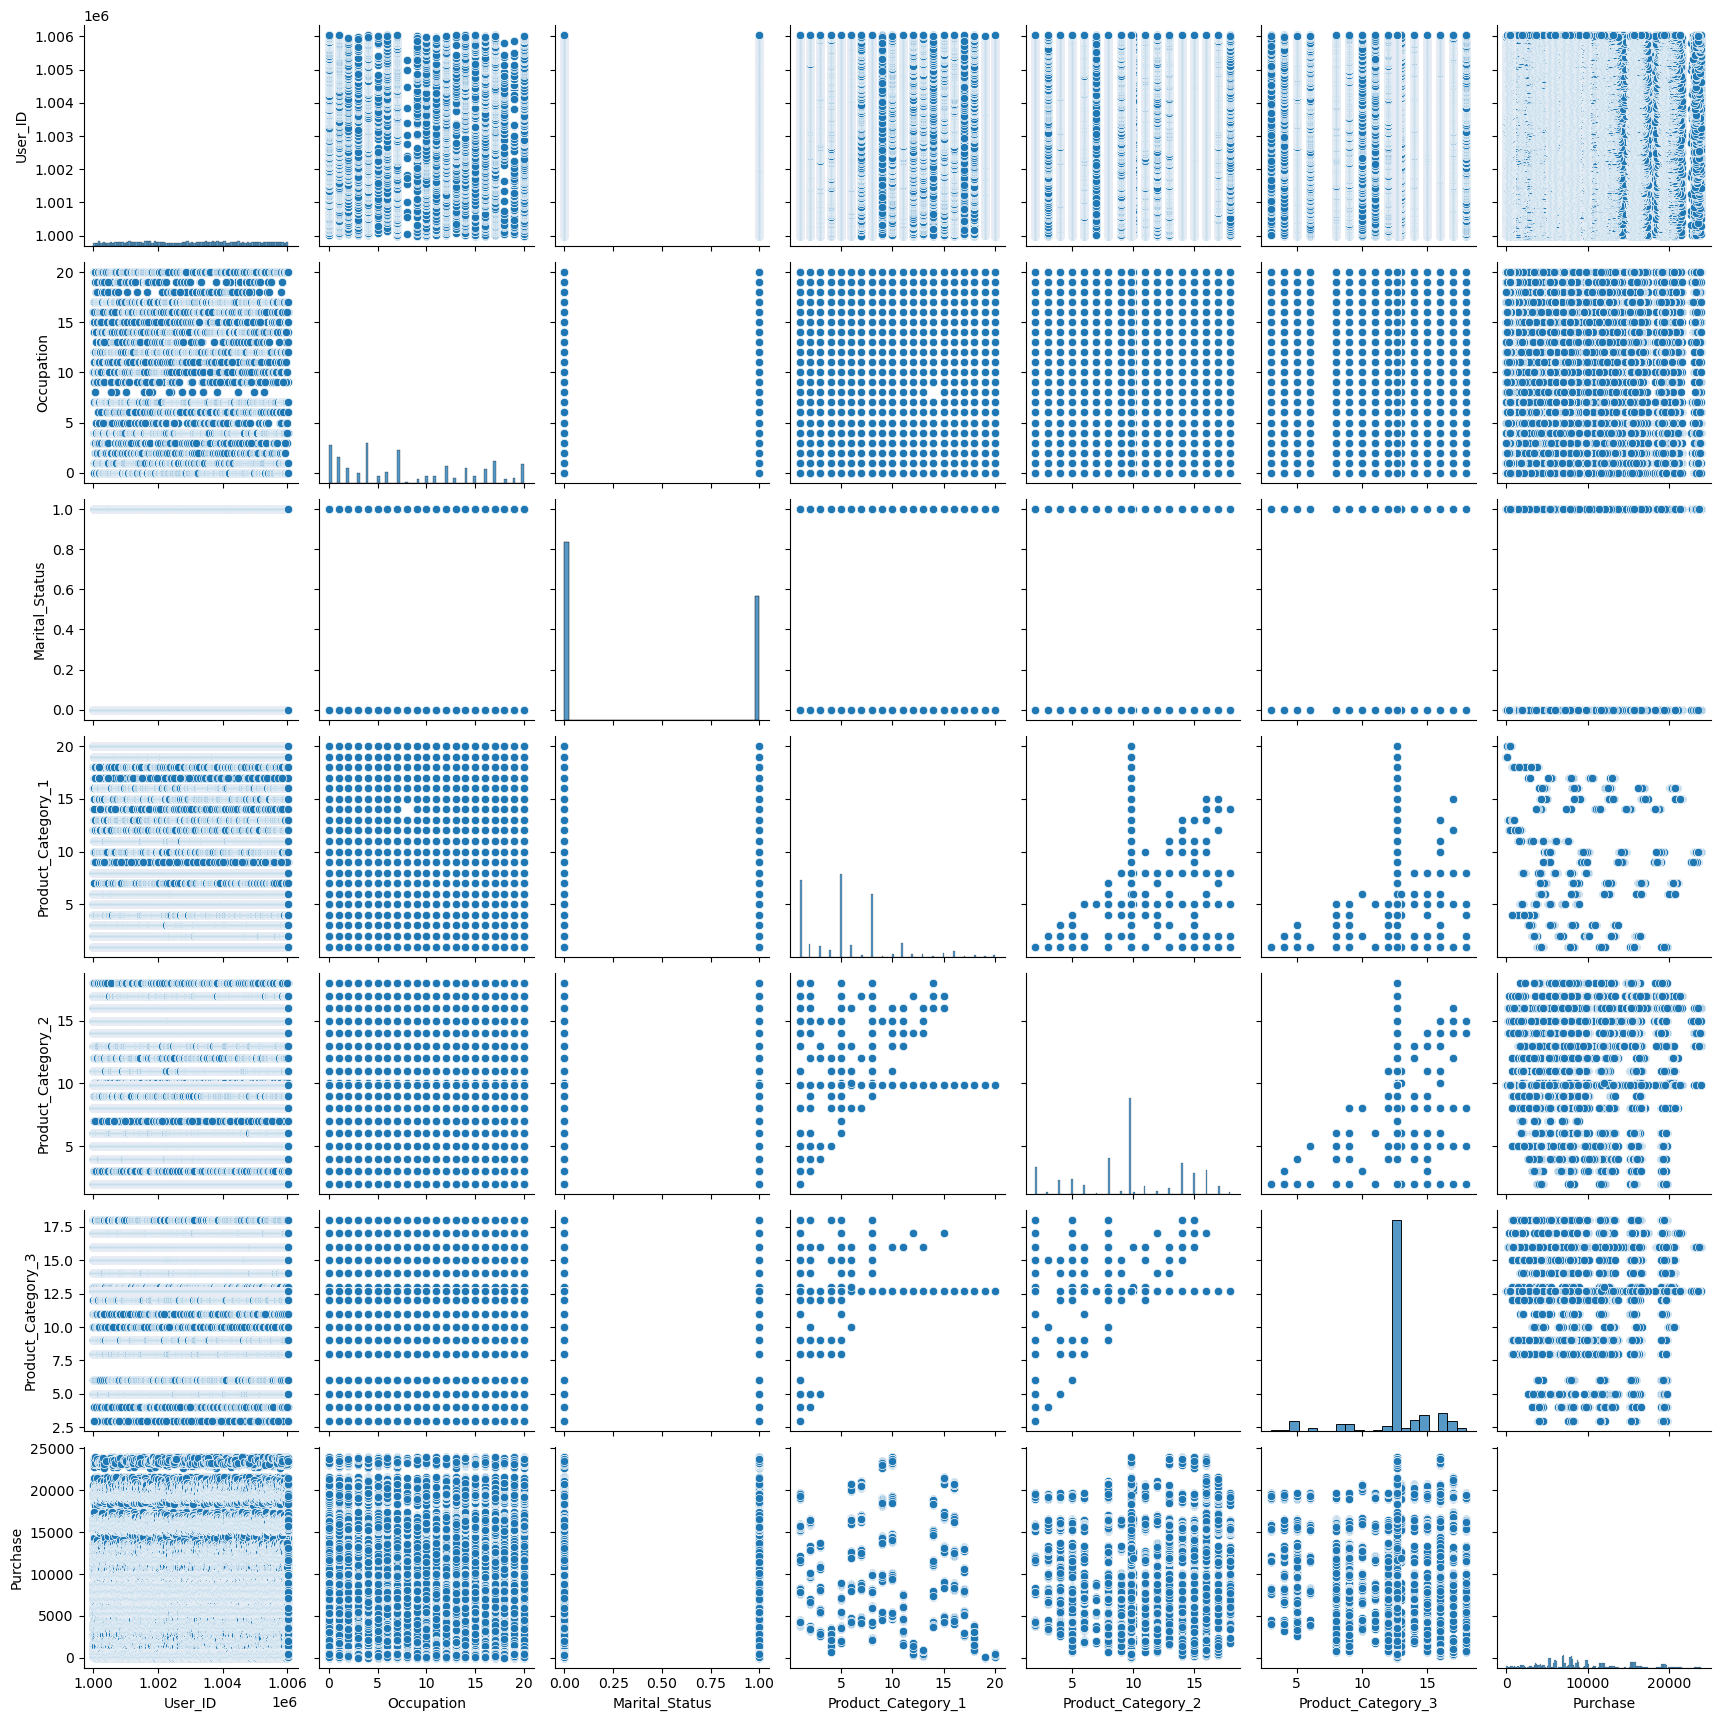

In [34]:
# Creating a Pairplot for all features
plt.style.use('default')
sns.pairplot(df)
plt.show()

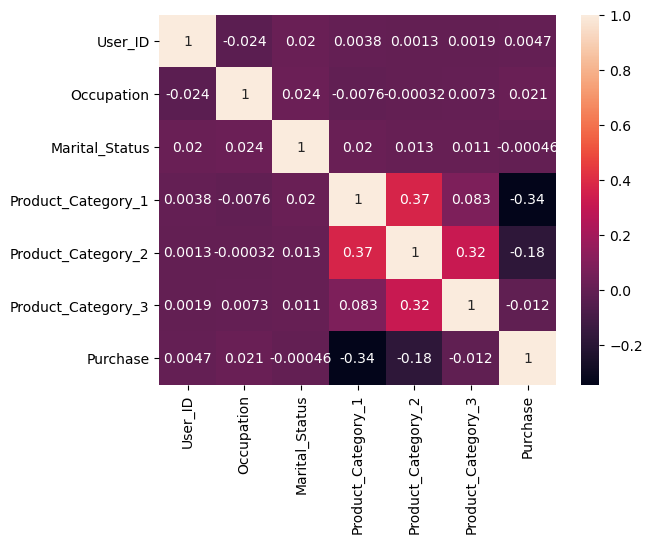

In [35]:
# Creating a heatmap of correlation matrix
sns.heatmap(df.corr(), annot = True)
plt.show()

In [36]:
## Data preprocessing

In [37]:
df_test = pd.read_csv("test.csv")

In [38]:
#### Merging of train and test

In [39]:
df['source'] = 'df'
df_test['source'] = 'df_test'

In [40]:
fulldata = pd.concat([df, df_test])

In [41]:
fulldata.shape

(783667, 13)

In [42]:
#### Replacing + in 'Age' and 'Stay_In_Current_City_Years'

In [43]:
fulldata['Age'] = fulldata['Age'].apply(lambda x : str(x).replace('55+', '55'))
fulldata['Stay_In_Current_City_Years'] = fulldata['Stay_In_Current_City_Years'].apply(lambda x : str(x).replace('4+', '4'))

In [44]:
#### Dropping irrelevant features

In [45]:
fulldata.drop('User_ID', axis = 1, inplace = True)
fulldata.drop('Product_ID', axis = 1, inplace = True)

In [46]:
fulldata['Age'] = fulldata['Age'].apply(lambda x : str(x).replace('55+', '55'))
fulldata['Stay_In_Current_City_Years'] = fulldata['Stay_In_Current_City_Years'].apply(lambda x : str(x).replace('4+', '4'))
fulldata.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,source
0,F,0-17,10,A,2,0,3,9.842329,12.668243,8370.0,df
1,F,0-17,10,A,2,0,1,6.000000,14.000000,15200.0,df
2,F,0-17,10,A,2,0,12,9.842329,12.668243,1422.0,df
3,F,0-17,10,A,2,0,12,14.000000,12.668243,1057.0,df
4,M,55,16,C,4,0,8,9.842329,12.668243,7969.0,df


In [47]:
gender_dict = {'F':0, 'M':1}
fulldata['Gender'] = df['Gender'].apply(lambda x: gender_dict[x])
fulldata.head()
# encoding values using dictonary

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,source
0,0,0-17,10,A,2,0,3,9.842329,12.668243,8370.0,df
1,0,0-17,10,A,2,0,1,6.000000,14.000000,15200.0,df
2,0,0-17,10,A,2,0,12,9.842329,12.668243,1422.0,df
3,0,0-17,10,A,2,0,12,14.000000,12.668243,1057.0,df
4,1,55,16,C,4,0,8,9.842329,12.668243,7969.0,df


In [48]:
fulldata.isnull().sum()

Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2             72344
Product_Category_3            162562
Purchase                      233599
source                             0
dtype: int64

In [49]:
col = ['Product_Category_2']
for i in col:
 fulldata.loc[fulldata.loc[:,i].isnull(),i]=fulldata.loc[:,i].mean()
col = ['Product_Category_3']
for i in col:
 fulldata.loc[fulldata.loc[:,i].isnull(),i]=fulldata.loc[:,i].mean()

In [50]:
#### Feature Encoding

In [51]:
from sklearn.preprocessing import LabelEncoder

In [52]:
label_encoder_age = LabelEncoder()
fulldata['Age'] = label_encoder_age.fit_transform(fulldata['Age'])
label_encoder_city = LabelEncoder()
fulldata['City_Category'] = label_encoder_city.fit_transform(fulldata['City_Category'])
label_encoder_stay = LabelEncoder()
fulldata['Stay_In_Current_City_Years'] = label_encoder_stay.fit_transform(fulldata['Stay_In_Current_City_Years'])

In [53]:
fulldata = pd.get_dummies(fulldata, columns=['Age','City_Category','Gender'])
fulldata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 20 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Occupation                  783667 non-null  int64  
 1   Stay_In_Current_City_Years  783667 non-null  int32  
 2   Marital_Status              783667 non-null  int64  
 3   Product_Category_1          783667 non-null  int64  
 4   Product_Category_2          783667 non-null  float64
 5   Product_Category_3          783667 non-null  float64
 6   Purchase                    550068 non-null  float64
 7   source                      783667 non-null  object 
 8   Age_0                       783667 non-null  uint8  
 9   Age_1                       783667 non-null  uint8  
 10  Age_2                       783667 non-null  uint8  
 11  Age_3                       783667 non-null  uint8  
 12  Age_4                       783667 non-null  uint8  
 13  Age_5         

In [54]:
train = fulldata.loc[fulldata['source']=="df"]
test = fulldata.loc[fulldata['source']=="df_test"]

#Drop unnecessary columns:

#Export files as modified versions:


In [55]:
test.drop(['Purchase','source'],axis=1,inplace=True)
train.drop(['source'],axis=1,inplace=True)


In [56]:
train.to_csv("train_modified.csv",index=False)
test.to_csv("test_modified.csv",index=False)

In [57]:
train_new = pd.read_csv("train_modified.csv")
test_new= pd.read_csv("test_modified.csv")

In [58]:
#### Separating train into X and Y

In [59]:
X = train_new.drop(['Purchase'],axis=1)
y = train_new.Purchase
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [60]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
from xgboost import XGBRegressor

In [61]:
#### Training_the_model

In [62]:
xgb=XGBRegressor( objective='reg:squarederror', max_depth=6, learning_rate=0.1, n_estimators=700, booster = 'gbtree', n_jobs = -1,random_state = 0)
xgb.fit(X_train,y_train)
y_pred = xgb.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print('RMSE =', rmse)
print('R2 =', r2)

RMSE = 2854.47000148647
R2 = 0.6773332035453749


In [63]:
y_pred

array([12506.171 ,  1293.7045, 15292.859 , ..., 13864.05  , 14577.741 ,
       14834.366 ], dtype=float32)

In [64]:
#Predict training set:
predictors = train_new.columns.drop(['Purchase'])
train_new_predictions = xgb.predict(train_new[predictors])
target = 'Purchase'

In [66]:
# make predictions using actual model
test_new[target] = xgb.predict(test_new[predictors])
test_new[target].to_csv("submissione.csv")
test_new[target]

0         14962.050781
1         11205.100586
2          6695.587402
3          2719.610840
4          3031.514404
              ...     
233594     7284.041992
233595     6307.806641
233596    13569.874023
233597    20363.267578
233598     1415.296753
Name: Purchase, Length: 233599, dtype: float32